# Sunspots Time Series

This dataset contains yearly measurements of sunspot activity from the 1700s to 1900s.

We convert the `YEAR` column to a datetime format and plot sunspot activity over time. This time series shows clear cyclical patterns — a great candidate for further trend/seasonality analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import  sunspots

In [9]:
data = sunspots.load_pandas().data


In [10]:
data.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


**Preprocessing: Time Index Conversion**

The original dataset contains a `YEAR` column as a float (e.g., 1749.0, 1750.0). Since time series models work best with datetime indexes, we convert this year to a proper datetime object using the `pd.to_datetime()` function.

Assumptions:
- Each year represents January 1st of that year.
- No monthly breakdown exists — it’s annual data.

In [11]:
data['DATE'] = pd.to_datetime(data['YEAR'].astype(int), format='%Y')
data.set_index('DATE', inplace=True)
data = data[['SUNACTIVITY']]
data.rename(columns={'SUNACTIVITY': 'Sunspots'}, inplace=True)

In [12]:
data.head()

,Sunspots
DATE,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


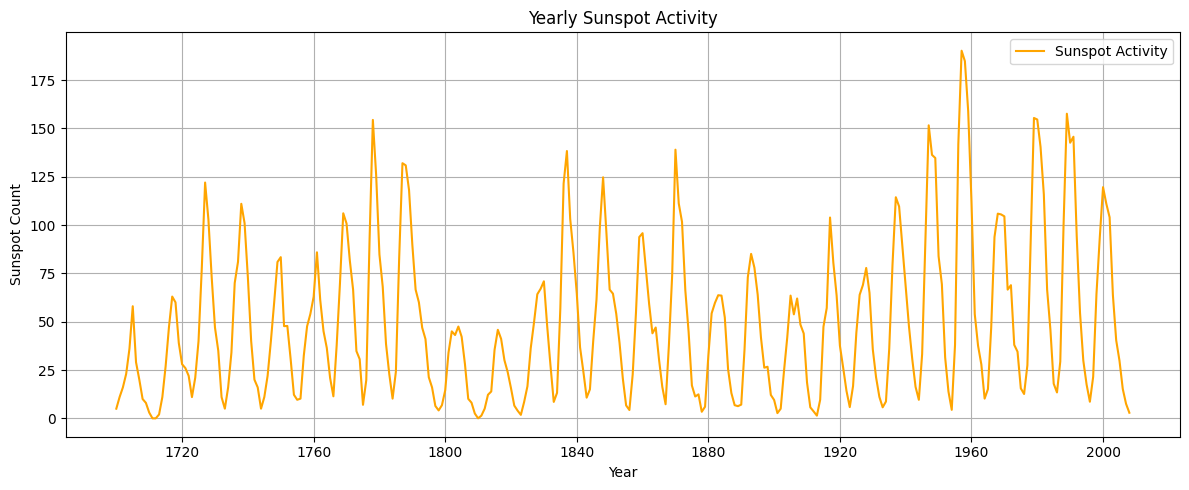

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Sunspots'], color='orange', label='Sunspot Activity')
plt.title('Yearly Sunspot Activity')
plt.xlabel('Year')
plt.ylabel('Sunspot Count')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()